<a href="https://colab.research.google.com/github/wreckweg/Face_Recognition_Project/blob/main/Face_Recognition_droneFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.0 MB/s eta 0:00:00


In [4]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from mtcnn.mtcnn import MTCNN

In [8]:
img = cv2.imread('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Train/a/a_0_1099.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

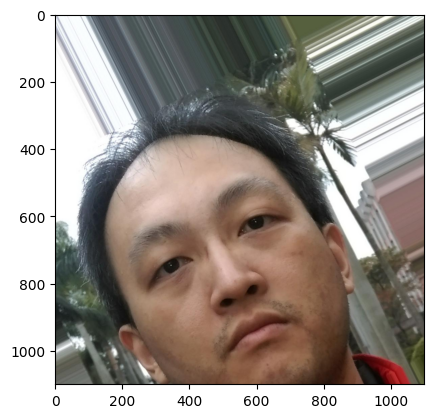

In [9]:
plt.imshow(img)

In [10]:
detector = MTCNN()
result = detector.detect_faces(img)

1/1 [==============================] - 0s 171ms/step


In [11]:
result

[{'box': [196, 391, 667, 735],
  'confidence': 0.9999901056289673,
  'keypoints': {'left_eye': (347, 748),
   'right_eye': (613, 620),
   'nose': (530, 807),
   'mouth_left': (505, 1002),
   'mouth_right': (708, 907)}}]

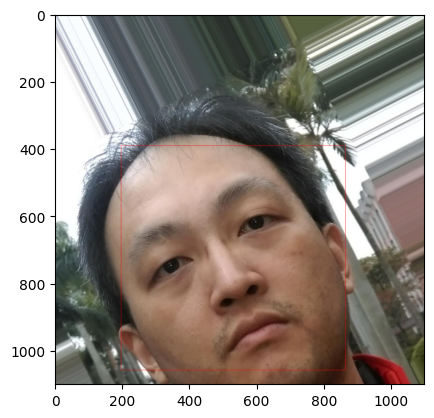

In [12]:
x,y,w,h = result[0]['box']
img2= cv2.rectangle(img,(x,y),(x+w, y+w),(255,0,0),1)
plt.imshow(img2)

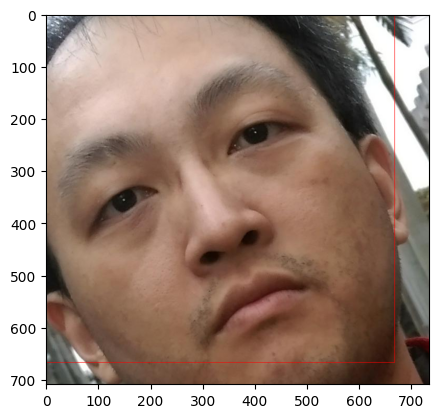

In [13]:
img_face =img[y:y+h, x:x+h]
plt.imshow(img_face)

In [14]:
class FaceLoad:
  def __init__(self,directory):
    self.directory = directory
    self.target_size= (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()
  
  def extract_face(self,file):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res= self.detector.detect_faces(img)
    x,y,w,h = res[0]['box']
    x,y = abs(x),abs(y)
    face= img[y:y+h , x:x+w]
    face_arr =cv2.resize(face,self.target_size)
    return face_arr

  def load_faces(self,dir):
    FACES=[]
    for im_name in os.listdir(dir):
      path = dir+ im_name
      single_face = self.extract_face(path)
      FACES.append(single_face)
    return FACES
  
  def load_lables(self):
    for sub_dir in os.listdir(self.directory):
      path= self.directory + '/' +sub_dir+'/'
      FACES = self.load_faces(path)
      labels = [sub_dir for _ in range(len(FACES))]
      print(f"loaded successfully : {len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X),np.asarray(self.Y)
  
  def plot_img(self):
    for num, image in enumerate(self.X):
      ##ncols=10
      ##nrows=len(self.Y)
      plt.subplot(10,10,num+1)
      plt.imshow(image)

In [15]:
#faceloading = FaceLoad('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Train')
#X_train, Y_train = faceloading.load_lables()

In [16]:
#image1 = X_train[50]
#plt.imshow(image1)

In [17]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=f8b0b125aa4e890ba23dbed473b347e56645a92ef95b1d9ac28fab0817465056
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [18]:
from keras_facenet import FaceNet
embedder= FaceNet()

In [19]:
def get_embedding(face_img):
  face_img = face_img.astype('float32') #3d 160x160x3
  # add another dimension because tf requires 4d
  face_img = np.expand_dims(face_img, axis=0)#none x 160 x 160 x 3 

  yhat = embedder.embeddings(face_img)
  return yhat[0] # we will get 512 D array and it will then be compared

In [20]:
#emb_X_train =[]

#for img in X_train:
  #emb_X_train.append(get_embedding(img))

In [21]:
#emb_X_train = np.asarray(emb_X_train)

In [22]:
#len(emb_X_train)

In [23]:
#Base_Path = '/content/drive/MyDrive/Face_recognisation/DroneFace_dataset'
#np.savez_compressed(os.path.join(Base_Path, 'face_embed_train.npz'), emb_X_train,Y_train)

In [24]:
#np.savez_compressed(os.path.join(Base_Path, 'Y_train_labels.npz'),Y_train)

In [25]:
class FaceLoad_test_face:
  def __init__(self,directory):
    self.directory = directory
    self.target_size= (160,160)
    self.X = []
    self.Y = []
  
  def extract_face(self,file):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_arr =cv2.resize(img,self.target_size)
    return face_arr

  def load_faces(self,dir):
    FACES=[]
    for im_name in os.listdir(dir):
      path = dir+ im_name
      single_face = self.extract_face(path)
      FACES.append(single_face)
    return FACES
  
  def load_lables(self):
    for sub_dir in os.listdir(self.directory):
      path= self.directory + '/' +sub_dir+'/'
      FACES = self.load_faces(path)
      labels = [sub_dir for _ in range(len(FACES))]
      print(f"loaded successfully : {len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X),np.asarray(self.Y)
  
  def plot_img(self):
    for num, image in enumerate(self.X):
      ##ncols=10
      ##nrows=len(self.Y)
      plt.subplot(10,10,num+1)
      plt.imshow(image)

In [26]:
faceloading_test = FaceLoad_test_face('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Test/height_1.5m')
X_test_1_5m, Y_test_1_5m = faceloading_test.load_lables()

loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31


In [28]:
X_train = np.load('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/face_embed_train.npz')

In [34]:
X_train['arr_0']

array([[ 0.00510885, -0.05419249, -0.05285618, ..., -0.07157597,
        -0.02347584,  0.03033886],
       [ 0.00237934, -0.0541784 , -0.04812131, ..., -0.06973033,
        -0.04613305,  0.0314523 ],
       [ 0.00992417, -0.06943005, -0.04032784, ..., -0.05609868,
        -0.05693858,  0.007827  ],
       ...,
       [-0.00256141, -0.00869222, -0.00343526, ...,  0.00067233,
         0.05045691,  0.02484579],
       [ 0.01815892, -0.01962518,  0.02806791, ..., -0.025471  ,
         0.03040906,  0.01624877],
       [-0.00947956, -0.02364787, -0.01094525, ..., -0.0228899 ,
         0.04376145,  0.01644219]], dtype=float32)

In [35]:
emb_X_test_1_5 =[]

for img in X_test_1_5m:
  emb_X_test_1_5.append(get_embedding(img))

1/1 [==============================] - 0s 110ms/step


In [36]:
emb_X_test_1_5 = np.asarray(emb_X_test_1_5)

In [37]:
len(emb_X_test_1_5)

155

In [38]:
emb_X_test_1_5

array([[ 0.00868408,  0.01285211, -0.04980901, ..., -0.12785047,
        -0.03106002, -0.01528757],
       [ 0.10514954,  0.00338271, -0.01260129, ..., -0.04805619,
        -0.00461081, -0.03501514],
       [ 0.06657797,  0.0287963 , -0.04314249, ..., -0.0972811 ,
        -0.01782189, -0.00593404],
       ...,
       [ 0.05137077, -0.03301748,  0.00406736, ...,  0.03665016,
         0.01988011,  0.0285789 ],
       [ 0.043754  , -0.03753274,  0.01259624, ...,  0.04108754,
         0.04412948,  0.01859756],
       [ 0.06388614, -0.02255794,  0.00681228, ...,  0.04383575,
         0.02969813,  0.03645484]], dtype=float32)

In [39]:
emb_X_train= X_train['arr_0']

In [40]:
emb_X_train

array([[ 0.00510885, -0.05419249, -0.05285618, ..., -0.07157597,
        -0.02347584,  0.03033886],
       [ 0.00237934, -0.0541784 , -0.04812131, ..., -0.06973033,
        -0.04613305,  0.0314523 ],
       [ 0.00992417, -0.06943005, -0.04032784, ..., -0.05609868,
        -0.05693858,  0.007827  ],
       ...,
       [-0.00256141, -0.00869222, -0.00343526, ...,  0.00067233,
         0.05045691,  0.02484579],
       [ 0.01815892, -0.01962518,  0.02806791, ..., -0.025471  ,
         0.03040906,  0.01624877],
       [-0.00947956, -0.02364787, -0.01094525, ..., -0.0228899 ,
         0.04376145,  0.01644219]], dtype=float32)

In [41]:
Y_train = X_train['arr_1']

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y_train)
Y_train= encoder.transform(Y_train)
encoder.fit(Y_test_1_5m)
Y_test_1_5m= encoder.transform(Y_test_1_5m)

In [48]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', probability = True)

In [50]:
model.fit(emb_X_train, Y_train)

SVC(kernel='linear', probability=True)

In [52]:
y_preds = model.predict(emb_X_test_1_5)

In [53]:
from sklearn.metrics import accuracy_score

In [77]:
score_svm_1_5m = (accuracy_score(Y_test_1_5m,y_preds))*100

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_1_5m,y_preds)


In [57]:
import seaborn as sns

In [80]:
score_svm_1_5m= round(score_svm_1_5m, ndigits=2).item()

In [81]:
score_svm_1_5m

87.1

In [87]:
title_svm = 'Accuracy Score at 1.5m height = ' + str(score_svm_1_5m) + '%'

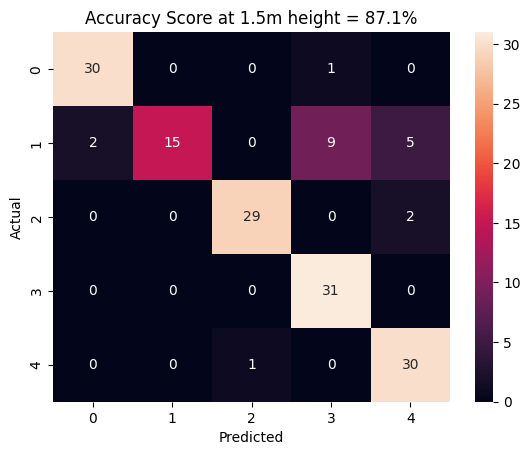

In [88]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title(title_svm)
plt.show()

In [89]:
faceloading_test = FaceLoad_test_face('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Test/height_3m')
X_test_3m, Y_test_3m = faceloading_test.load_lables()


loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31


In [90]:
emb_X_test_3m =[]

for img in X_test_3m:
  emb_X_test_3m.append(get_embedding(img))

1/1 [==============================] - 0s 212ms/step


In [93]:
emb_X_test_3m = np.asarray(emb_X_test_3m)

In [92]:
encoder.fit(Y_test_3m)
Y_test_3m= encoder.transform(Y_test_3m)

In [94]:
y_preds_3m = model.predict(emb_X_test_3m)

In [96]:
score_svm_3m = (accuracy_score(Y_test_3m,y_preds_3m))*100
score_svm_3m= round(score_svm_3m, ndigits=2).item()
title_svm_3 = 'Accuracy Score at 3m height = ' + str(score_svm_3m) + '%'
score_svm_3m

89.68

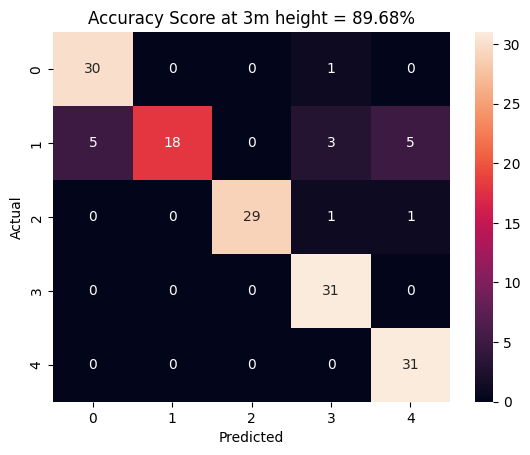

In [97]:
cm_3 = confusion_matrix(Y_test_3m,y_preds_3m)
sns.heatmap(cm_3, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(title_svm_3)
plt.show()

In [98]:
faceloading_test = FaceLoad_test_face('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Test/height_4m')
X_test_4m, Y_test_4m = faceloading_test.load_lables()

loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31


In [99]:
emb_X_test_4m =[]

for img in X_test_4m:
  emb_X_test_4m.append(get_embedding(img))

1/1 [==============================] - 0s 101ms/step


In [100]:
emb_X_test_4m = np.asarray(emb_X_test_4m)
encoder.fit(Y_test_4m)
Y_test_4m= encoder.transform(Y_test_4m)
y_preds_4m = model.predict(emb_X_test_4m)
score_svm_4m = (accuracy_score(Y_test_4m,y_preds_4m))*100
score_svm_4m= round(score_svm_4m, ndigits=2).item()
title_svm_4 = 'Accuracy Score at 4m height = ' + str(score_svm_4m) + '%'
score_svm_4m

86.45

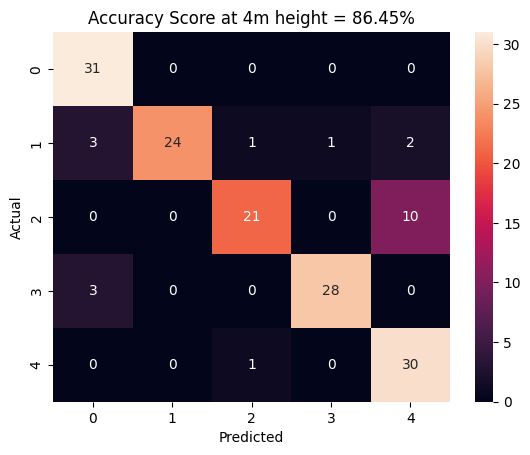

In [101]:
cm_4 = confusion_matrix(Y_test_4m,y_preds_4m)
sns.heatmap(cm_4, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(title_svm_4)
plt.show()

In [102]:
faceloading_test = FaceLoad_test_face('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Test/height_5m')
X_test_5m, Y_test_5m = faceloading_test.load_lables()

loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31
loaded successfully : 31


In [103]:
emb_X_test_5m =[]

for img in X_test_5m:
  emb_X_test_5m.append(get_embedding(img))

1/1 [==============================] - 0s 101ms/step


In [104]:
emb_X_test_5m = np.asarray(emb_X_test_5m)
encoder.fit(Y_test_5m)
Y_test_5m= encoder.transform(Y_test_5m)
y_preds_5m = model.predict(emb_X_test_5m)
score_svm_5m = (accuracy_score(Y_test_5m,y_preds_5m))*100
score_svm_5m= round(score_svm_5m, ndigits=2).item()
title_svm_5 = 'Accuracy Score at 5m height = ' + str(score_svm_5m) + '%'
score_svm_5m

76.77

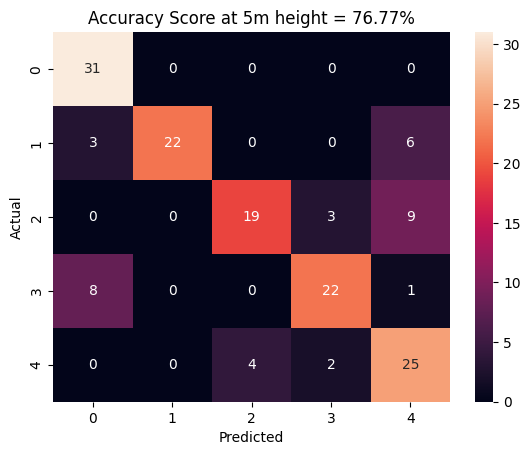

In [105]:
cm_5 = confusion_matrix(Y_test_5m,y_preds_5m)
sns.heatmap(cm_5, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(title_svm_5)
plt.show()